In [41]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes

from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
import matplotlib.pyplot as plt
from skimage import io
import numpy as np

In [8]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
endpoint = "https://aialbert.cognitiveservices.azure.com/"
vision_key = "f7f04076514241a9ab63353bd1093e89"
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(vision_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

# Problema 1

- Sa se foloseasca un algoritm de clasificare a imaginilor (etapa de inferenta/testare) si sa se stabileasca performanta acestui algoritm de clasificare binara (imagini cu biciclete vs. imagini fara biciclete)

In [47]:
realLabels = []
computedLabels = []
bikeFiles = []

image_files = os.listdir("images/bikes")
# print(image_files)

for image_file in image_files:

    img_path = os.path.join("images/bikes", image_file)
    # print(img_path)
    img = open(img_path, "rb")

    if "traffic" in img_path:
        realLabels.append("traffic")
    else:
        realLabels.append("bike")

    result = result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.tags, VisualFeatureTypes.objects])
    
    # with tags
    # ok = 0
    # for tag in result.tags:
    #     # print(tag)
    #     if ("bike" in tag.name or "bicycle" in tag.name) and ok == 0 :
    #         computedLabels.append("bike")
    #         bikeFiles.append(img_path)
    #         ok = 1

    # with objects
    ok = 0
    for object in result.objects:
        # print(tag)
        if(object.object_property == "bike" or object.object_property == "bicycle"):
            computedLabels.append("bike")
            bikeFiles.append(img_path)
            ok = 1
    
    if ok == 0:
        computedLabels.append("traffic")

print(realLabels)
print(computedLabels)


['traffic', 'bike', 'traffic', 'traffic', 'traffic', 'traffic', 'bike', 'bike', 'bike', 'bike', 'traffic', 'bike', 'traffic', 'bike', 'bike', 'bike', 'bike', 'traffic', 'traffic', 'traffic']
['traffic', 'bike', 'traffic', 'traffic', 'traffic', 'traffic', 'bike', 'bike', 'traffic', 'bike', 'traffic', 'bike', 'traffic', 'traffic', 'bike', 'bike', 'bike', 'traffic', 'traffic', 'traffic']


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


def evalClassification(realLabels, computedLabels, labelNames):
    acc = accuracy_score(realLabels, computedLabels)
    precision = precision_score(realLabels, computedLabels, average = None, labels = labelNames)
    recall = recall_score(realLabels, computedLabels, average = None, labels = labelNames)
    return acc, precision, recall 

acc, prec, recall = evalClassification(realLabels, computedLabels, ['bike', 'traffic'])
print('acc: ', acc, ' precision: ', prec, ' recall: ', recall)

acc:  0.9  precision:  [1.         0.83333333]  recall:  [0.8 1. ]


# Problema 2

### a. sa se localizeze automat bicicletele in aceste imagini si sa se evidentieze chenarele care incadreaza bicicletele

['images/bikes/bike04.jpg', 'images/bikes/bike10.jpg', 'images/bikes/bike03.jpg', 'images/bikes/bike06.jpg', 'images/bikes/bike09.jpg', 'images/bikes/bike07.jpg', 'images/bikes/bike08.jpg', 'images/bikes/bike05.jpg', 'images/bikes/bike02.jpg', 'images/bikes/bike1.jpg']
bike04.jpg


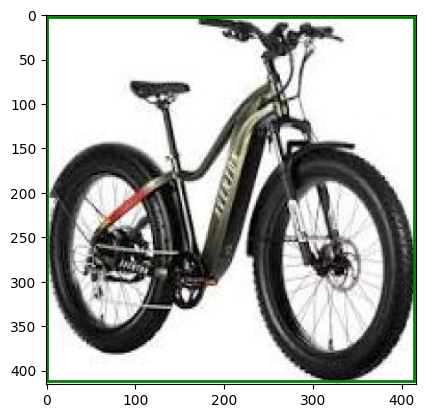

bike10.jpg


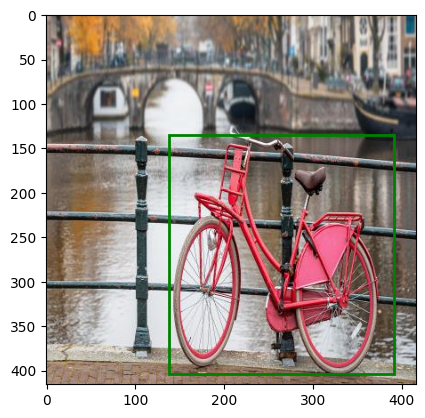

bike03.jpg


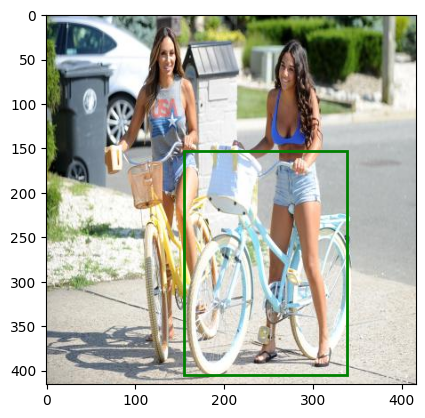

bike09.jpg


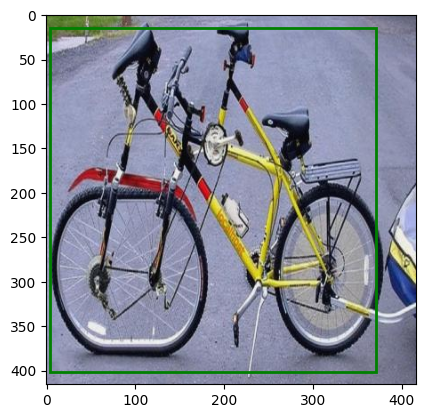

bike07.jpg


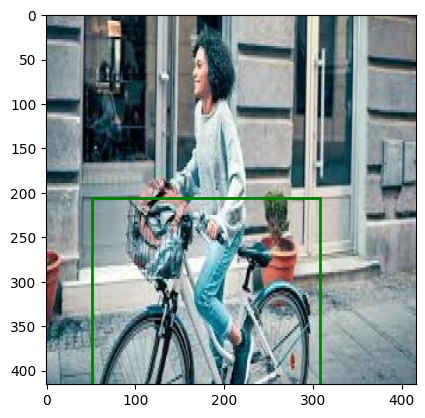

bike05.jpg


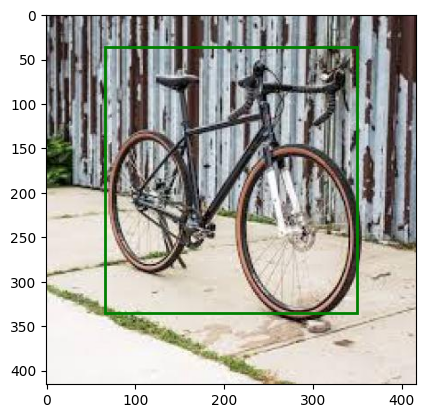

bike02.jpg


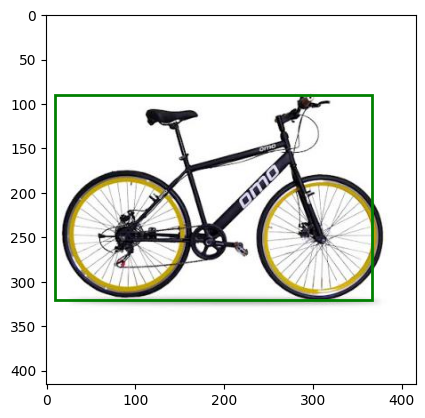

bike1.jpg


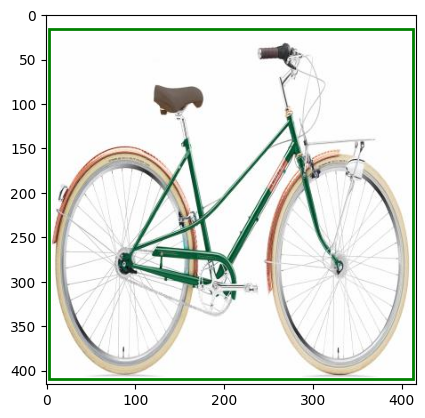

In [46]:
print(bikeFiles)

for image_file in image_files:

    img_path = os.path.join("images/bikes", image_file)
    img = open(img_path, "rb")

    result = computervision_client.analyze_image_in_stream(img, visual_features=[VisualFeatureTypes.objects])

    ok = False

    for object in result.objects:
        if(object.object_property == "bike" or object.object_property == "bicycle"):
            predicted_bike = [object.rectangle.x, object.rectangle.y, object.rectangle.x + object.rectangle.w, object.rectangle.y + object.rectangle.h]
            ok = True 

    if ok: 
        image = plt.imread(img_path)   
        fig = plt.imshow(image)

        fig.axes.add_patch(plt.Rectangle(xy = (predicted_bike[0], predicted_bike[1]), width = predicted_bike[2]-predicted_bike[0], height = predicted_bike[3]-predicted_bike[1], fill = False, color = "green", linewidth = 2))

        print(image_file)
        plt.show()